In [1]:
from matplotlib import pyplot as plt
from matplotlib import animation
import math

In [2]:
g = 9.80665

In [3]:
def get_intervals(u,theta):
    t_flight = 2*u*math.sin(theta)/g
    intervals = []
    start = 0
    interval = 0.005
    while start < t_flight:
        intervals.append(start)
        start = start + interval
    return intervals

In [4]:
def new_position(k, circle, intervals, u, theta):
    t = intervals[k]
    x = u*math.cos(theta)*t
    y = u*math.sin(theta)*t - 0.5*g*(t**2)
    circle.center = x,y
    
    return circle

In [5]:
def construct_animation(u,theta):
    intervals = get_intervals(u,theta)
    x_min = 0
    x_max = u*math.cos(theta)*intervals[-1]
    y_min = 0
    t_max = u*math.sin(theta)/g
    y_max = u*math.sin(theta)*t_max - 0.5*g*(t_max**2)
    
    fig = plt.gcf()
    ax = plt.axes(xlim = (x_min, x_max), ylim = (y_min, y_max))
    circle = plt.Circle((x_min, y_min), 1.0)
    ax.add_patch(circle)
    
    ani = animation.FuncAnimation(fig, new_position, fargs = (circle, intervals, u, theta), frames = len(intervals), interval = 5, repeat = False)
    
    plt.title('Parabolic Motion')
    plt.xlabel('x_coordinate')
    plt.ylabel('y_coordinate')
    
    ani.save('animation.gif', writer='pillow')
    plt.show()
    

what is the initial velocity?40
what is the angle of projection(degrees)?50


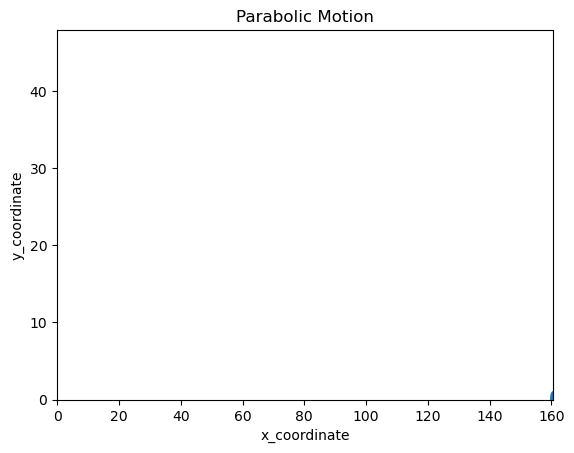

In [6]:
if __name__ == '__main__':
    try:
        u = float(input('what is the initial velocity?'))
        theta = float(input('what is the angle of projection(degrees)?'))
    except ValueError:
        print('try again!')
    else:
        theta = math.radians(theta)
        construct_animation(u,theta)